This is the code for equation 
y'' - 2xy' - 2y= -4x

Boundary conditions are

y(0) - y'(0) = 0  

2y(1) - y'(1) = 1


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 15]

In [37]:
def A(x):
    return (-2*x)
def B(x):
    return -2
def C(x):
    return (-4*x)

def get_a(x, h):
    return 1/(h**2) - A(x)/(2.0 * h)
def get_b(x, h):
    return - 2/(h**2) + B(x)
def get_c(x, h):
    return 1/(h**2) + A(x)/(2.0 * h)

def TDMA(sub, diag, sup, d):
    """
    All the parameters are numpy arrays
    diag --> Diagonal entries of the tri-diagonal matrix
    sub --> Sub-Diagonal entries of the tri-diagonal matrix
    sup --> Super-Diagonal entries of the tri-diagonal matrix
    """
    n = len(diag)
    sup1 = np.zeros(n)
    d1 = np.zeros(n)
    
    sup1[0] = sup[0]/diag[0]
    d1[0] = d[0]/diag[0]
    for i in range(1, n):
        sup1[i] = sup[i]/(diag[0] - sup1[i - 1]*sub[i])
        d1[i] = (d[i] - d1[i - 1]*sub[i])/(diag[0] - sup1[i - 1]*sub[i])
    
    y = np.zeros(n)
    y[n - 1] =  d1[n - 1]
    for i in range(n - 2, -1, -1):
        y[i] = d1[i] - sup1[i] * y[i + 1]
    return y



In [38]:
def BVP(x0, xn, h, n):
    x = [(x0 + itr * h) for itr in range(1, n)]

    a = [get_a(itr, h) for itr in x]
    b = [get_b(itr, h) for itr in x]
    c = [get_c(itr, h) for itr in x]
    d = [C(itr) for itr in x]

    b[0] += 4 / (2*h + 3) * a[0]
    c[0] += (-1) / (2*h + 3) * a[0]

    b[n-2] += 4 / (3 - 4*h) * c[n-2]
    a[n-2] += (-1) / (3 - 4*h) * c[n-2]
    d[n-2] += (2*h) / (3 - 4*h) * c[n-2]

    return TDMA(a, b, c, d)

In [39]:
# Take Differential Equation as an inputs
# Initializing boundary conditions y(1) = 0, y(1.4) = 0.0566
x0 = 0.0
xn = 1.0
steps = [0.1, 0.05, 0.01]
# n = int((xn - x0)/steps[1]) + 1
# for i in range(1, n):
#     print(x0 + i*steps[1])

n = int(np.ceil((xn - x0)/steps[1]))
y_0_ = BVP(x0, xn, steps[1], n)
print(y_0_)
y_0[1:n] = y_0_
y_0[0] = (4/(2*steps[1] + 3))*y_0[1] - (1/(2*steps[1] + 3))*y_0[2]
print(y_0)
np.append(4*y_0[n-1] - y_0[n-2] - 2*steps[1]) / (3 - 4*steps[0])
# n = int((xn - x0)/steps[1]) + 1
# y_1 = BVPsolution(x0, xn, steps[1])
# y_1 = np.insert(y_1, 0 , 4/(2*steps[1] + 3)*y_1[0] - 1/(2*steps[1] + 3)*y_1[1])
# np.append(y_1, (4*y_1[n-1] - y_1[n-2] - 1) / (e - (3/2)*steps[1]))
# print('Values of xi wrt step = 0.1') 
# print(x0)
# print(y_0)
# print('Values of xi wrt step = 0.05') 
# print(y_1)
# print('Values of xi wrt step = 0.01') 
# print(y_2)

[ 0.01553236  0.01565097 -0.00550262 -0.02134328 -0.0117445   0.01089055
  0.01692261 -0.00258679 -0.0235729  -0.01905472  0.00574945  0.01868295
  0.00141246 -0.02561783 -0.0276557  -0.00062046  0.02116719  0.00752611
 -0.02697931]


ValueError: could not broadcast input array from shape (19) into shape (9)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
(10,)
Plotting wrt h = 0.1, h = 0.05, h =0.01


/Users/apple/anaconda3/envs/env-python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

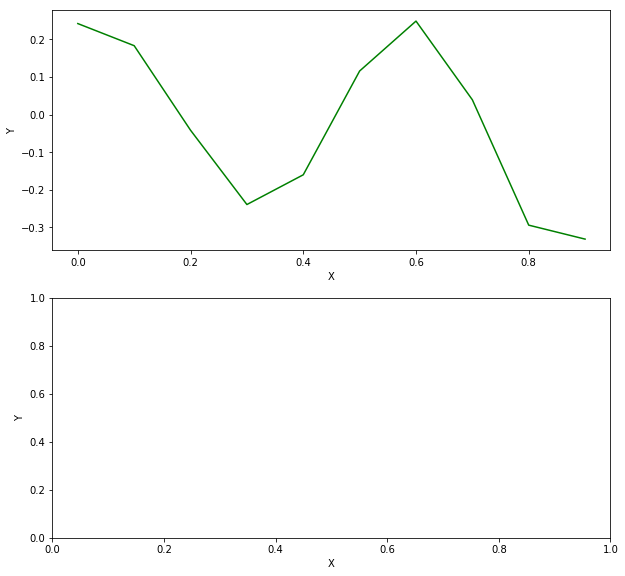

In [65]:

def f(x0, xn, h = 0.1):
    return np.arange(x0, xn, h)

def func(arr):
    return (np.power(np.log(arr), 2)/2)

x_range0 = f(x0, xn, h = steps[0])
# np.append(x_range0, 1)
print(x_range0)
x_range1 = f(x0, xn, h = steps[1])
x_range2 = f(x0, xn, h = steps[2])
print(y_0.shape)
y_range0 = func(x_range0)
y_range1 = func(x_range1)
y_range2 = func(x_range2)

print("Plotting wrt h = 0.1, h = 0.05, h =0.01")
# print((y_range0 - y_0)/y_range0)
# print((y_range1 - y_1)/y_range1)
# print((y_range2 - y_2)/y_range2)
#Plotting step = 0.1 

plt.subplot(3, 1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot( x_range0, y_0, 'g')
#Plotting step = 0.05 
plt.subplot(3, 1, 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot( x_range1, y_1, 'g')
#Plotting step = 0.001 
plt.subplot(3, 1, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot( x_range2, y_2, 'g')
plt.show()